<a href="https://colab.research.google.com/github/GMartinez02/Big-Data---43C8-Fall-2024/blob/Concepts-as-Code/Homework1_PCA_%26_nSVA_with_Vehicle_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import *
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
curent_folder='Big Data - 43C8/Homework Code/Homework1'
dest_folder='/content/drive/My Drive/'+curent_folder
os.chdir(dest_folder)
print('Path:',  os.getcwd())

Mounted at /content/drive
Path: /content/drive/My Drive/Big Data - 43C8/Homework Code/Homework1


###PCA Function


In [30]:
data = pd.read_csv('vehicles.csv')
col_names = list(data.columns)
data.head()

,Sports,SUV,Wagon,Minivan,Pickup,AWD,RWD,Retail,Dealer,Engine,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,Wheelbase,Length,Width
Acura 3.5 RL,0,0,0,0,0,0,0,43755,39014,3.5,6,225,18,24,3880,115,197,72
Acura 3.5 RL Navigation,0,0,0,0,0,0,0,46100,41100,3.5,6,225,18,24,3893,115,197,72
Acura MDX,0,1,0,0,0,1,0,36945,33337,3.5,6,265,17,23,4451,106,189,77
Acura NSX S,1,0,0,0,0,0,1,89765,79978,3.2,6,290,17,24,3153,100,174,71
Acura RSX,0,0,0,0,0,0,0,23820,21761,2.0,4,200,24,31,2778,101,172,68


In [27]:
#in progresss
def doPCA (data, normalizaion_bit, PCA_info):
  if normalizaion_bit==1:
    normalized_data=MinMaxScaler().fit_transform(data)
  elif normalizaion_bit==2:
    normalized_data=StandardScaler().fit_transform(data)
  elif normalizaion_bit==3:
    normalized_data=RobustScaler().fit_transform(data)
  elif normalizaion_bit==4:
    normalized_data=MaxAbsScaler().fit_transform(data)
  elif normalizaion_bit==5:
    normalized_data=QuantileTransformer(output_distribution='normal').fit_transform(data)
  else:
    normalized_data=data

  pca = PCA(n_components=2)
  newData = pca.fit_transform(normalized_data)

  if PCA_info == 1:
    detail = pca.explained_variance_
  if PCA_info == 2:
    detail = pca.explained_variance_ratio_
  if PCA_info == 3:
    detail = pca.components_




  return newData, detail

In [62]:
#general pca with undetermined PCs to see see which variables can be removed
pca = PCA()
newData = pca.fit_transform(MinMaxScaler().fit_transform(data))
print(pca.explained_variance_ratio_)

[2.93695639e-01 2.53422651e-01 1.36375808e-01 8.87607572e-02
 7.61628103e-02 5.47285940e-02 4.40759412e-02 1.83632146e-02
 9.62342149e-03 7.86552840e-03 5.79090110e-03 3.58835723e-03
 3.00632949e-03 2.56222093e-03 1.58346965e-03 3.84969394e-04
 9.38729551e-06 1.26441996e-34]


###Plotting Standardized Data

In [ ]:
def PCA_biplot (normalized_PC, loadings):
  fig, ax = plt.subplots()

  for i, variables in enumerate(col_names):
      ax.arrow(0,0,
              loadings[0,i],
              loadings[1,i],
              head_length = 0.06,
              head_width = 0.06,
              color = "orange")
      ax.text(loadings[0,i] ,
              loadings[0,i],
              variables,
              color = "orange")

  ax.scatter(PC1, PC2, s = 8)

  ax.set_xlabel('PC1')
  ax.set_ylabel('PC2')
  ax.set_title('Min-Max, Biplot')

  return plt.show()

In [59]:
#Using MinMaxScaler()
min_max_PC, loadings= doPCA(data, 1, 3)  #Dr.Han -> "loadings are componants"
#print(min_max)
print(min_max_PC.shape)
print()
print(loadings)
print(loadings.shape)

(387, 2)

[[-2.88420038e-01  4.58996544e-01  4.83394343e-03  2.88111558e-02
  -2.77555756e-17  5.47393819e-01 -6.04409415e-01 -4.58323183e-02
  -4.68459058e-02  2.91343115e-02 -1.16143201e-02 -4.27645447e-02
  -3.15267962e-02 -5.38690728e-02  1.16312104e-01  7.41397366e-02
   5.01962697e-02  8.82243487e-02]
 [ 1.64736223e-01  2.86600568e-01 -4.91300948e-02  1.07076997e-02
  -1.11022302e-16  2.33974827e-01  4.69628049e-01  1.53623291e-01
   1.53947643e-01  3.90740022e-01  2.85437481e-01  2.77539296e-01
  -1.60795079e-01 -1.65354986e-01  2.52533238e-01  1.87951789e-01
   1.62424443e-01  2.75210161e-01]]
(2, 18)


In [40]:
#Data for Bipot
PC1=min_max_PC[:, 0]
PC2=min_max_PC[:, 1]

print(PC1.shape)
print(PC2.shape)

(387,)
(387,)


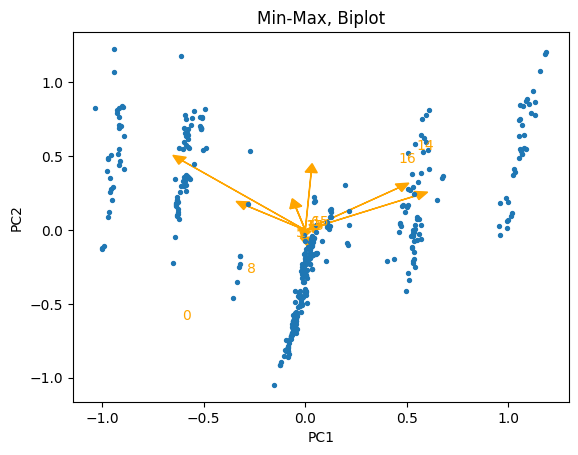

In [67]:
#important variable selection
col_names = np.argsort(np.abs(loadings[0]))[-10:]
####
fig, ax = plt.subplots()

for i, variables in enumerate(col_names):
    ax.arrow(0,0,
            loadings[0,i],
            loadings[1,i],
            head_length = 0.06,
            head_width = 0.06,
            color = "orange")
    ax.text(loadings[0,i] ,
            loadings[0,i],
            variables,
            color = "orange",
            fontsize = 10)

ax.scatter(PC1, PC2, s = 8)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Min-Max, Biplot')
plt.show()